지역을 입력하시오. : 부산진구


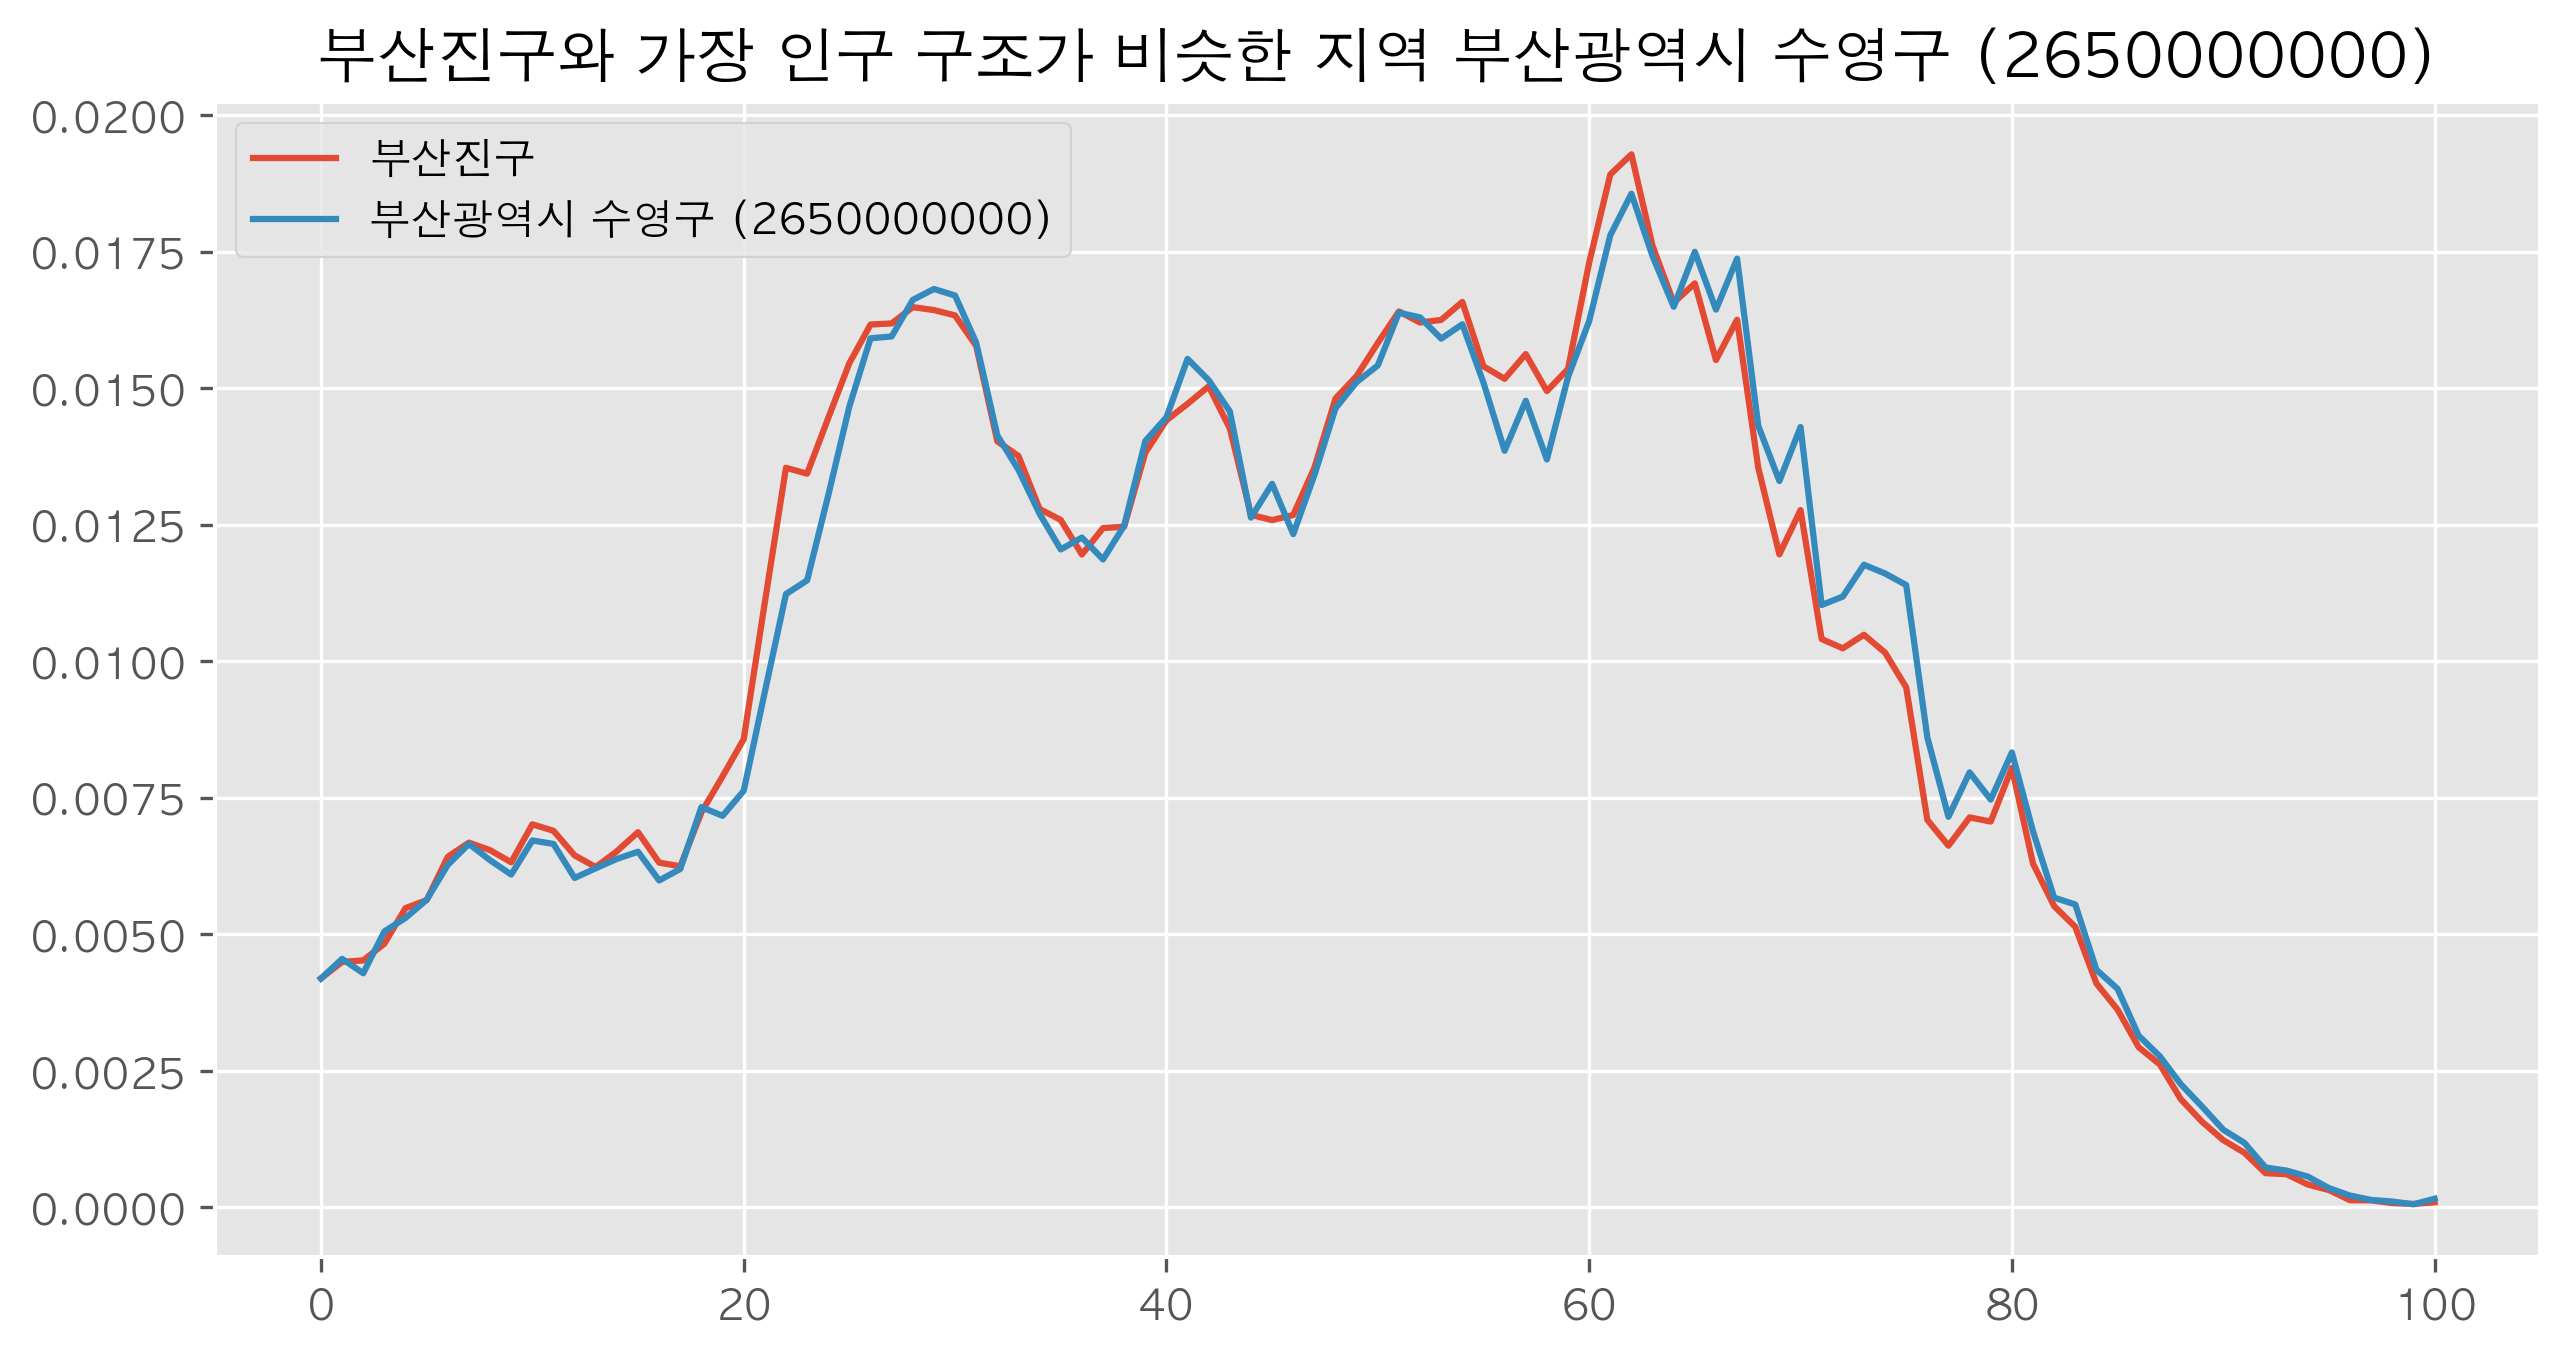

In [39]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('busan_age.csv', 'r', encoding='utf-8')
data = csv.reader(f, delimiter=',')
head = next(data)
head2 = next(data)
data = list(data)

home = []
name = input('지역을 입력하시오. : ')

min = 1
result = 0
result_name = ''

for row in data:
    if name in row[0]:
        for i in row[3:104]:
            home = np.array(row[3:104], dtype=int) / int(row[2])
            
# print(home)

for row in data:
    away = np.array(row[3:104], dtype=int) / int(row[2])
    s = np.sum((home - away)**2)
    # 결과가 출력되지 않는 이유 : data가 객체이므로 상위에서 사용될 경우 결과가 출력되지 않는다.
    # 해결방법 : 객체를 list로 변환한다.
    # print(s)
    if s < min and name not in row[0]:
        min = s
        result_name = row[0]
        result = away
#         print(result, result_name)


        
plt.rc('font', family='AppleGothic')
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.title('{}와 가장 인구 구조가 비슷한 지역 {}'.format(name, result_name))
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()

plt.show()